In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from skimage import color
import itertools as it
import math
import time

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper
from src import picture_cross

In [2]:
import logging
logger = logging.getLogger()

In [3]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [4]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [5]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

## Zwei Gaussians
Einer statisch, einer bewegt sich in jeder möglichen Richtung

In [6]:
size = 200

### Statischer Gaussian

In [7]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

In [8]:
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0],[0, variance_y]], size]

In [9]:
colorscheme_generator = color_schemes.create_color_brewer_colorscheme
colorscheme_names = ["red", "purple", "green", "orange", "blue'"]

In [10]:
colorschemes = [{"colorscheme": colorscheme_generator, "colorscheme_name": colorscheme_name} for colorscheme_name in colorscheme_names]

In [11]:
gaussians_2d = []
for mu_x, variance_x, mu_y, variance_y in it.permutations([-5, -2, 0, 2, 5, 10, 15],4):
    if not (variance_x < 0 or variance_y < 0 or variance_x == 0 or variance_y == 0) and not (mu_x > 4 or mu_y > 4) and not(mu_x < -2 or mu_y < -2):
        gaussians_2d.append([x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0],[0, variance_y]], size])

In [12]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

var_x, var_y = [2,5,10,15,20], [15,20]
gaussians_2d = []
for i,mu_y in enumerate([-5,-2,0,2,5]):
    for j,mu_x in enumerate([-5,-2,0,2,5]):
        if mu_y > 0:
            variance_y = var_y[i-3]
            variance_x = var_x[j]
        else: variance_x = 5
        gaussians_2d.append([x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 2],[2, variance_y]], size])

In [13]:
gaussians_2 = []
for i in range(len(gaussians_2d)):
    gaussians_2.append([gaussian_static, gaussians_2d[i]])

In [14]:
logger.setLevel(logging.DEBUG)

In [15]:
from src import picture_cross

In [16]:
### without c-implementation 23.721891164779663s elapsed size = 200
start = time.time()
images_2 = []
z_sums = []
for i in range(len(gaussians_2)):
    z_list, image, z_sum = picture_cross.generate_image(gaussians_2[i], colorschemes, color_space ="lab", use_c_implementation=True)
    images_2.append(image)
    z_sums.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-5, -5], [[5, 2], [2, 5]], 200]]
Eigenvector: [[1. 0.]
 [0. 1.]] 
 Eigenvalues: [5. 5.]
Eigenvector: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
 Eigenvalues: [7. 3.]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2, -5], [[5, 2], [2, 5]], 200]]
Eigenvector: [[1. 0.]
 [0. 1.]] 
 Eigenvalues: [5. 5.]
Eigenvector: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
 Eigenvalues: [7. 3.]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, -5], [[5, 2], [2, 5]], 200]]
Eigenvector: [[1. 0.]
 [0. 1.]] 
 Eigenvalues: [5. 5.]
Eigenvector: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
 Eigenvalues: [7. 3.]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2, -5], [[5, 2], [2, 5]], 200]]
Eigenvector: [[1. 0.]
 [0. 1.]] 
 Eigenvalues: [5. 5.]
Eigenvector: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
 Eigenvalues: [7. 3.

In [17]:
from src import picture_cross_2

In [18]:
### without c-implementation 23.721891164779663s elapsed size = 200
start = time.time()
images_2_cross = []
z_sums_cross = []
for i in range(len(gaussians_2)): #len(gaussians_2)
    img_list = picture_cross_2.generate_image_lines(gaussians_2[i], colorschemes)
    
    z_list = helper.generate_gaussians(gaussians_2[i])
    _, _, z_sum = helper.generate_weights(z_list)
    images_2_cross.append(img_list)
    z_sums_cross.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

3.1213250160217285s elapsed


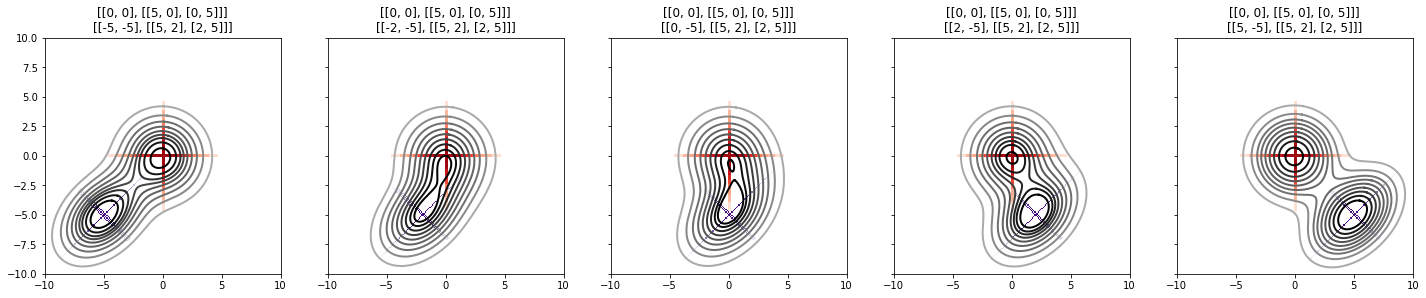

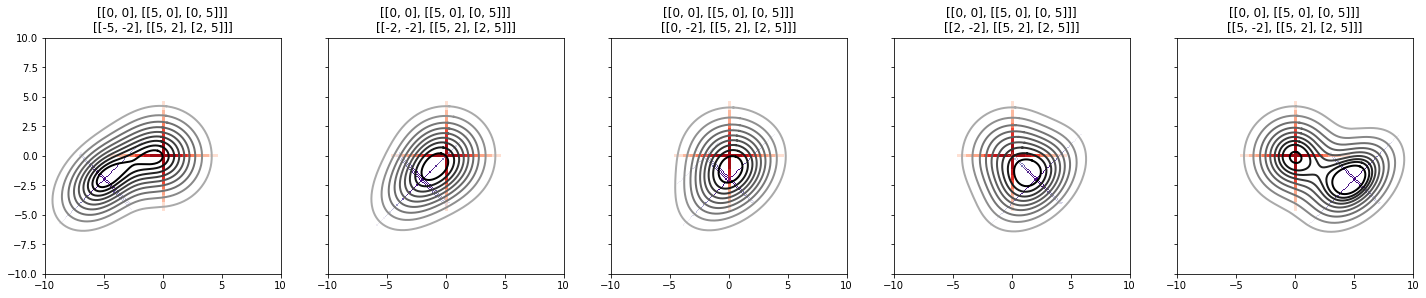

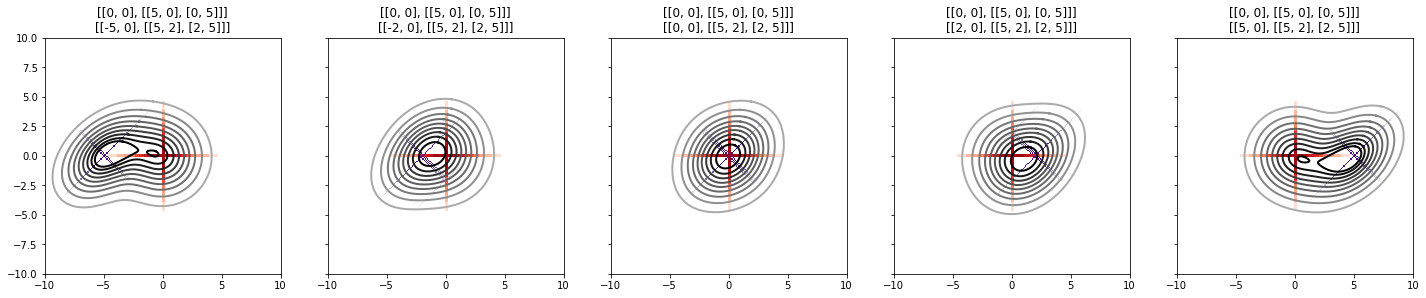

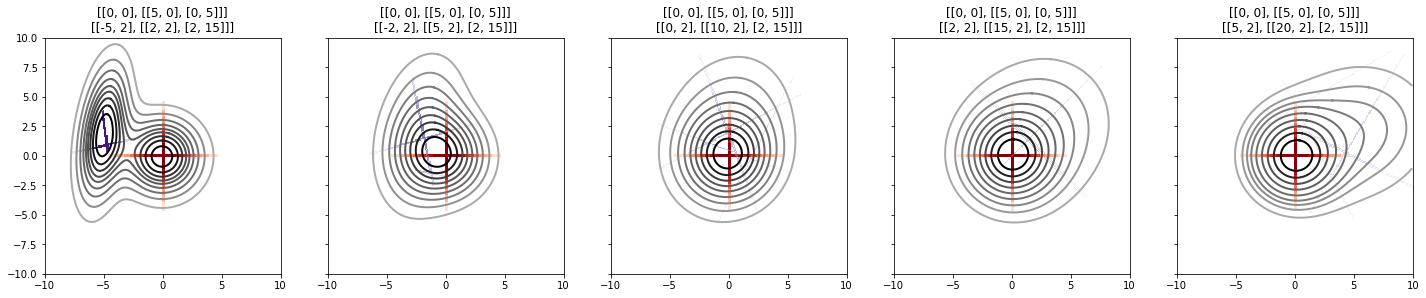

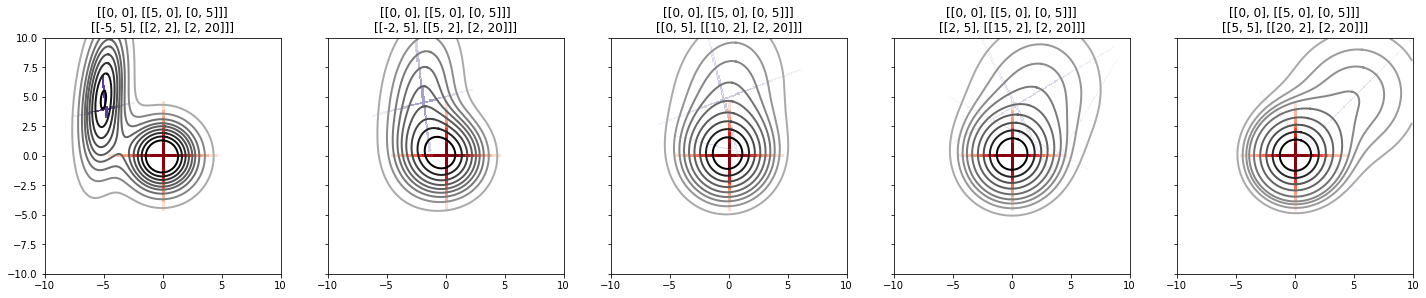

In [19]:
picture_worker.plot_images(images_2, gaussians_2, z_sums)

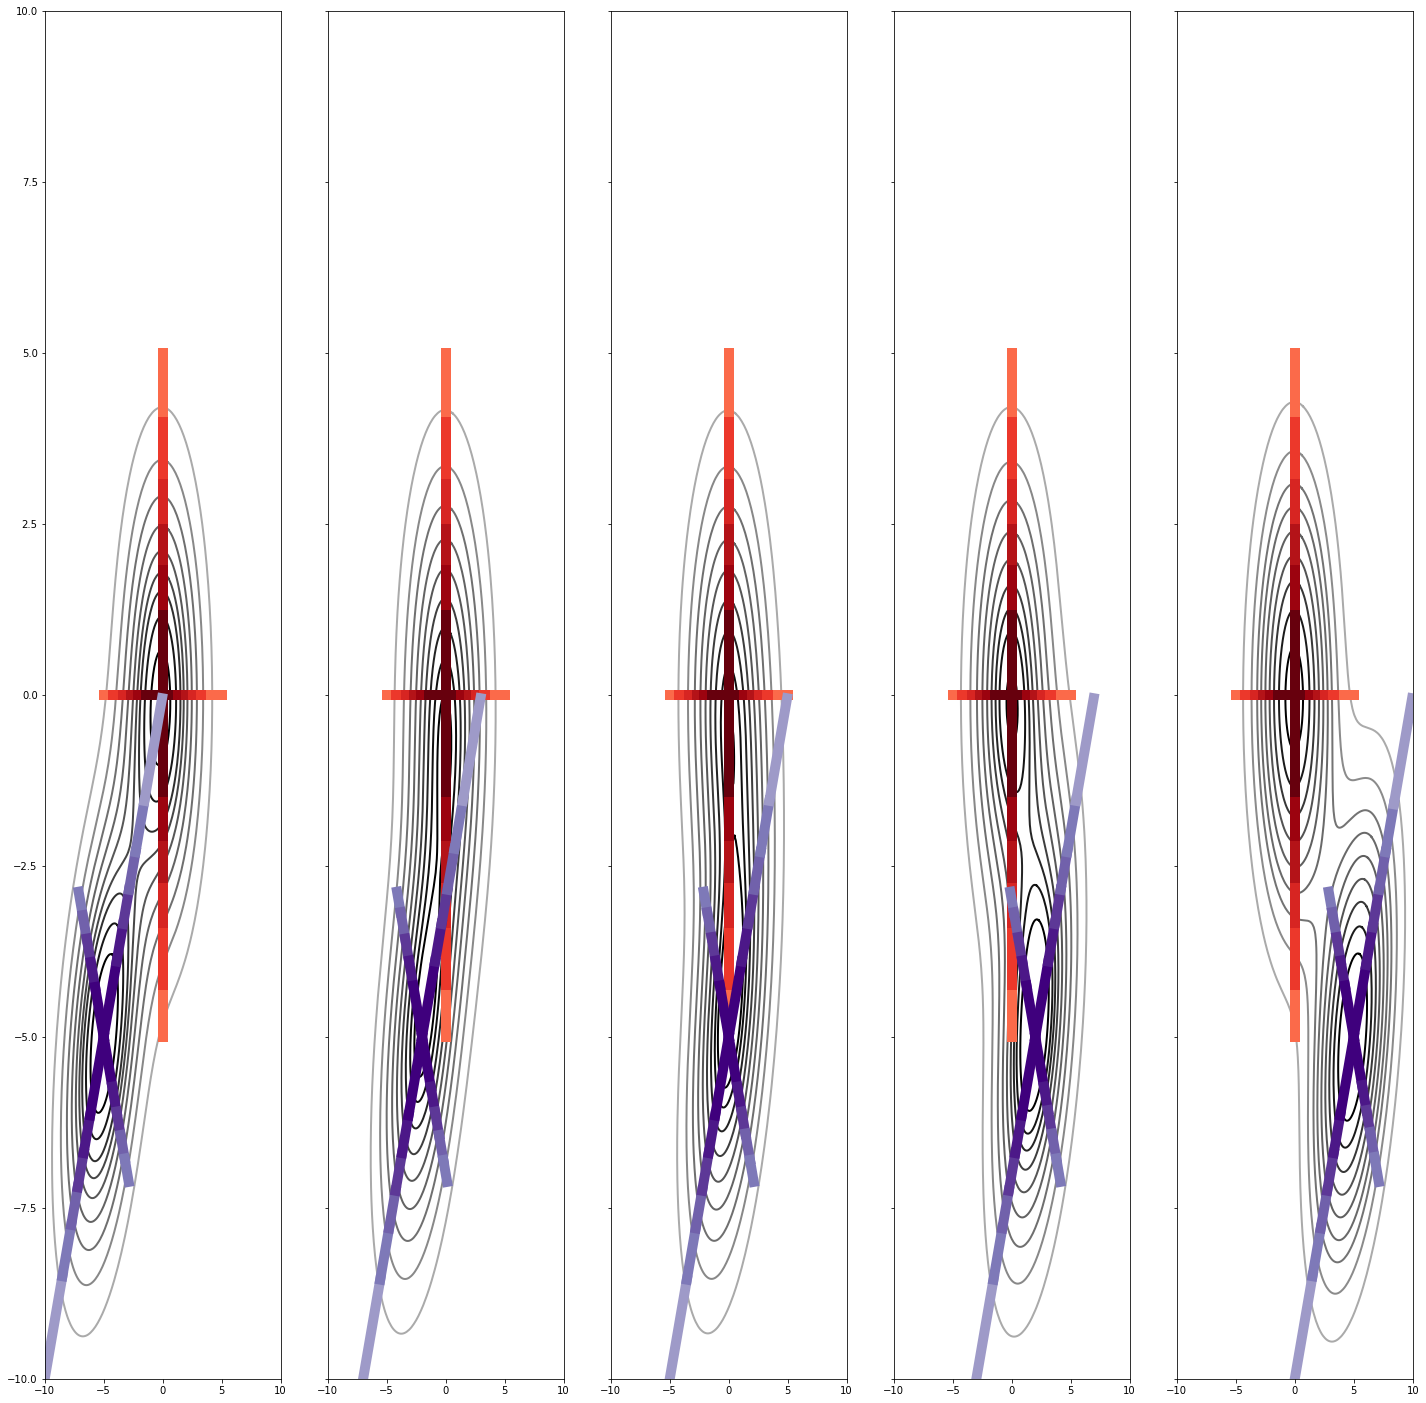

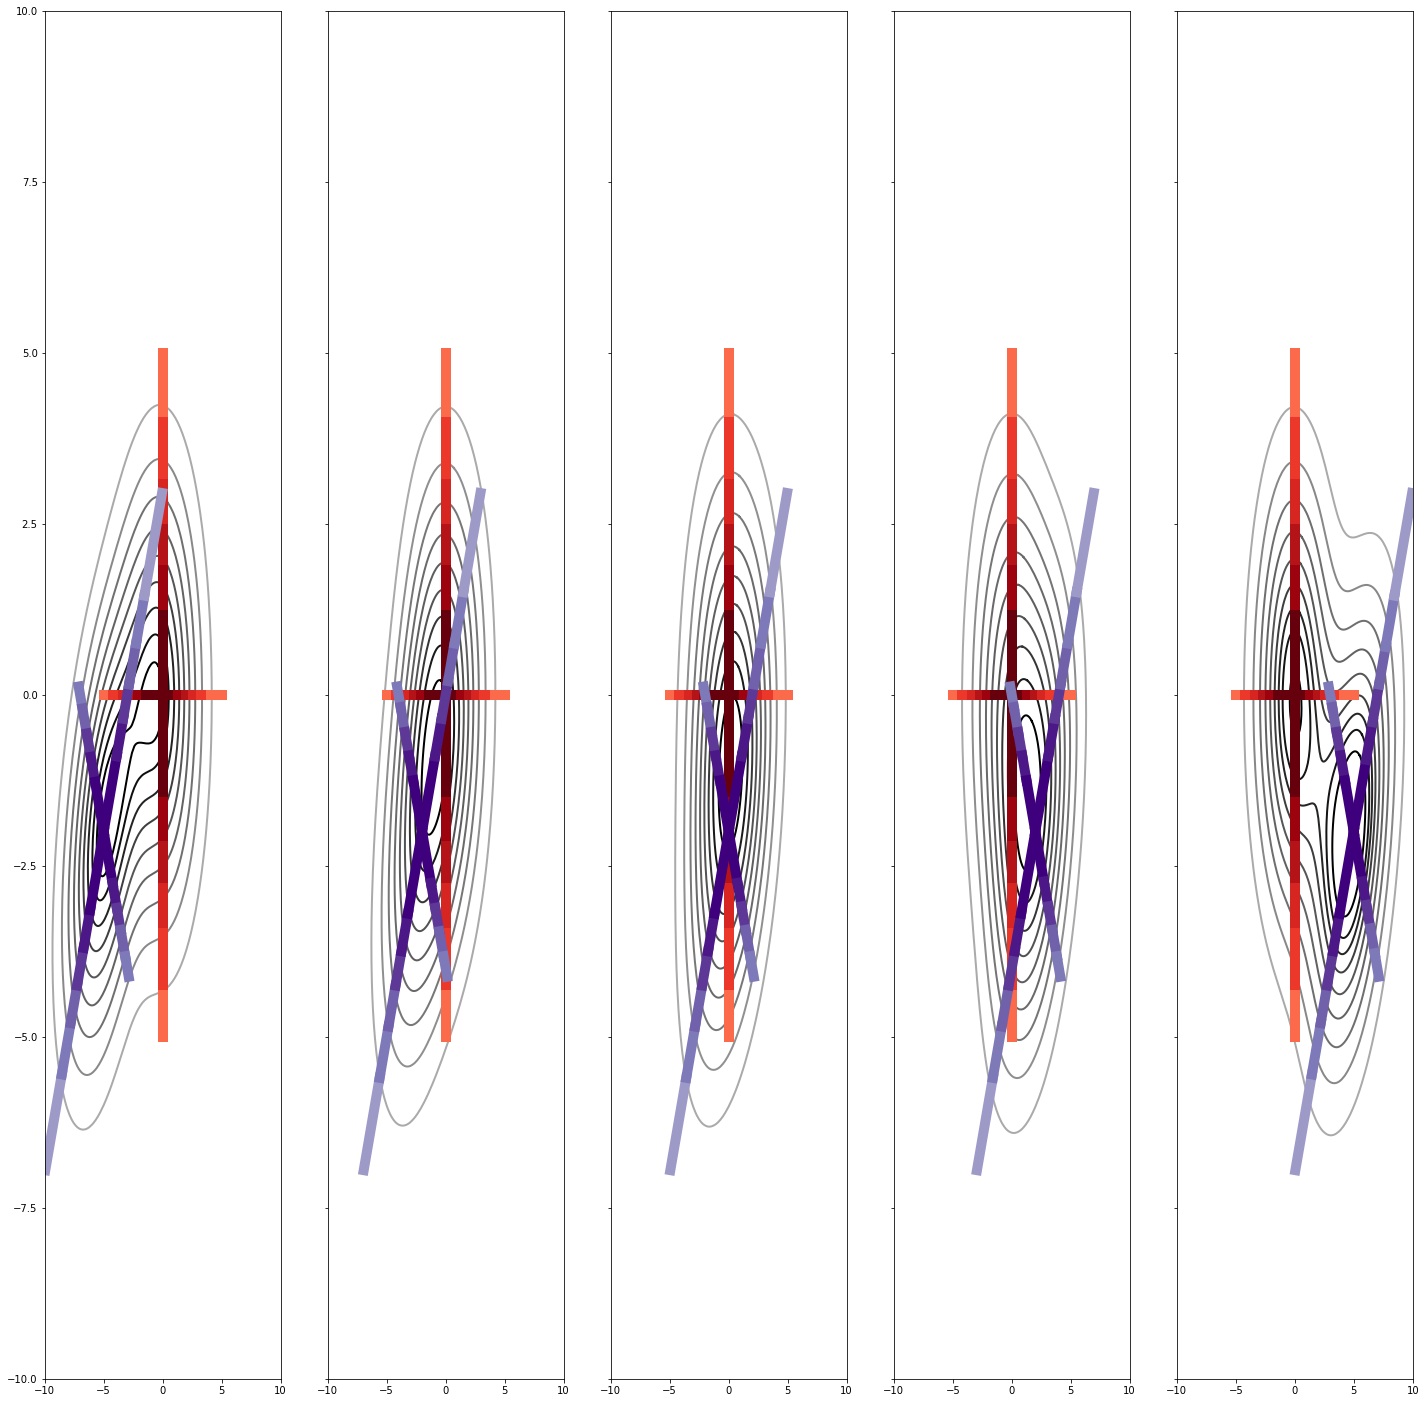

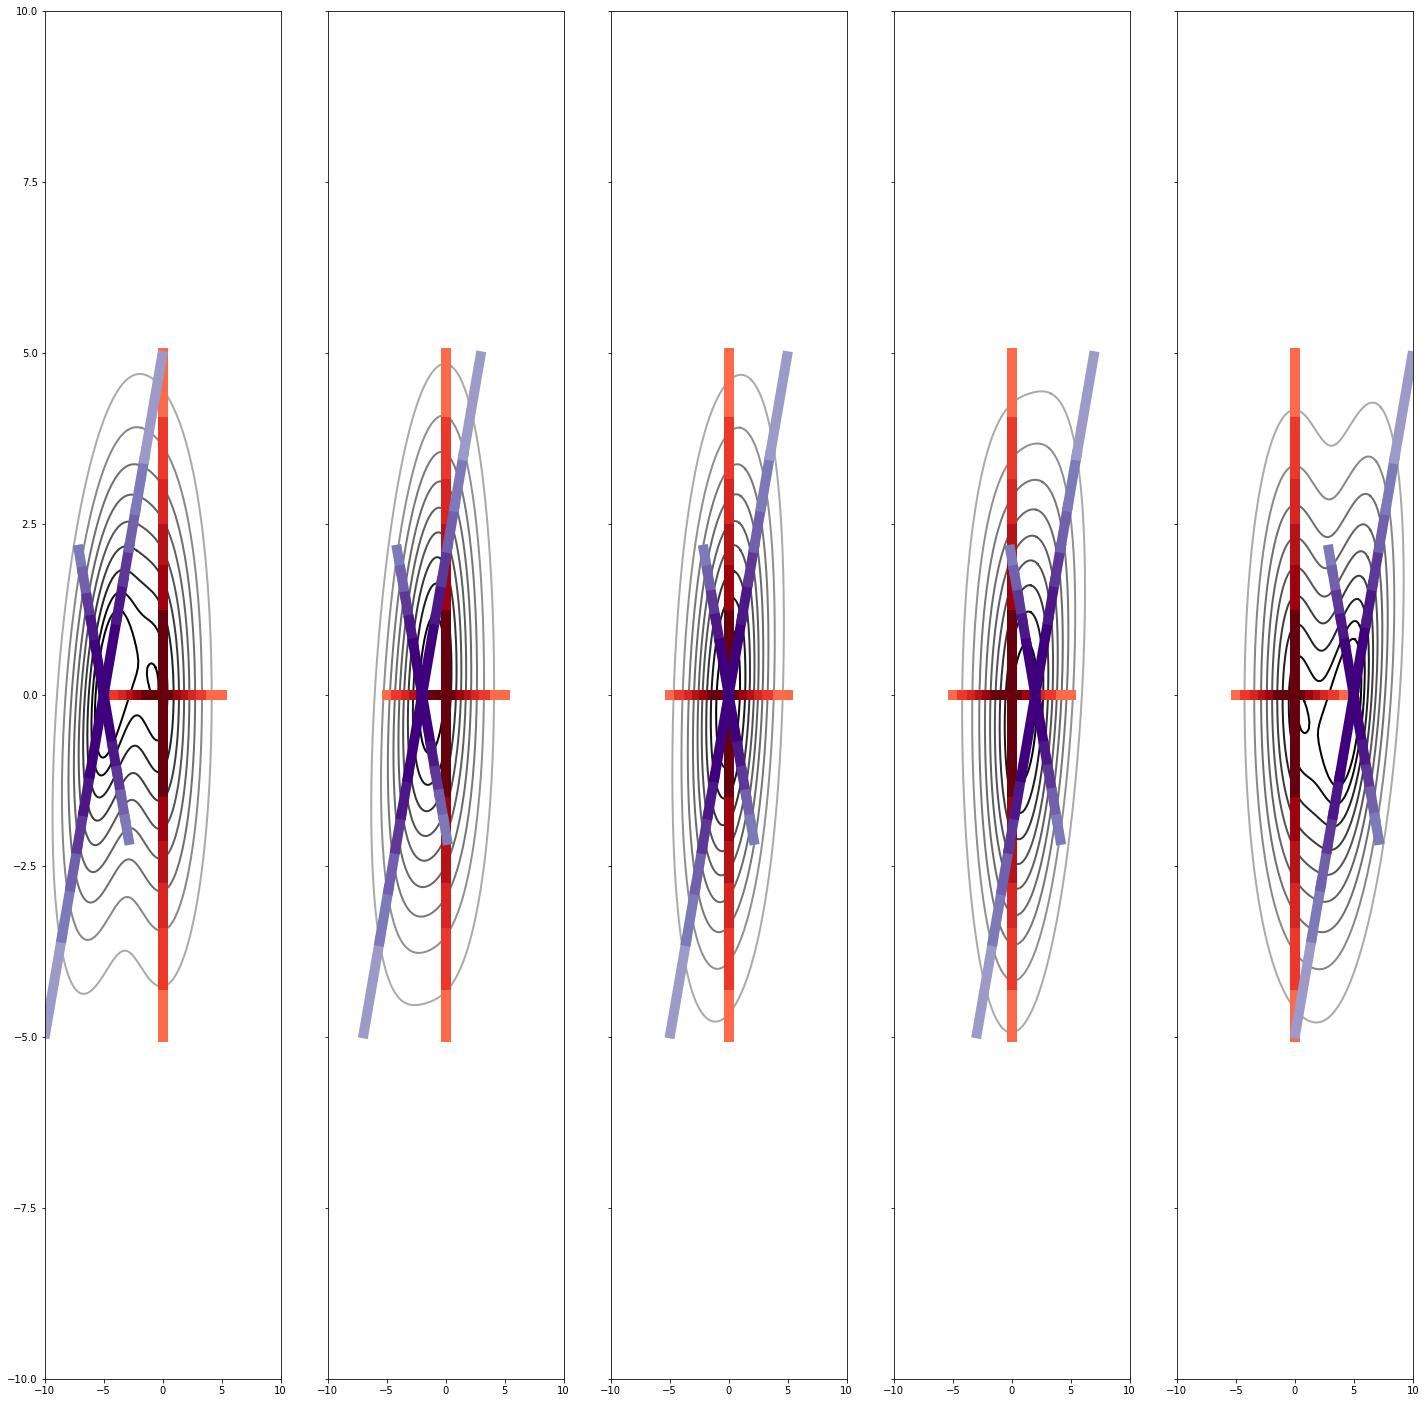

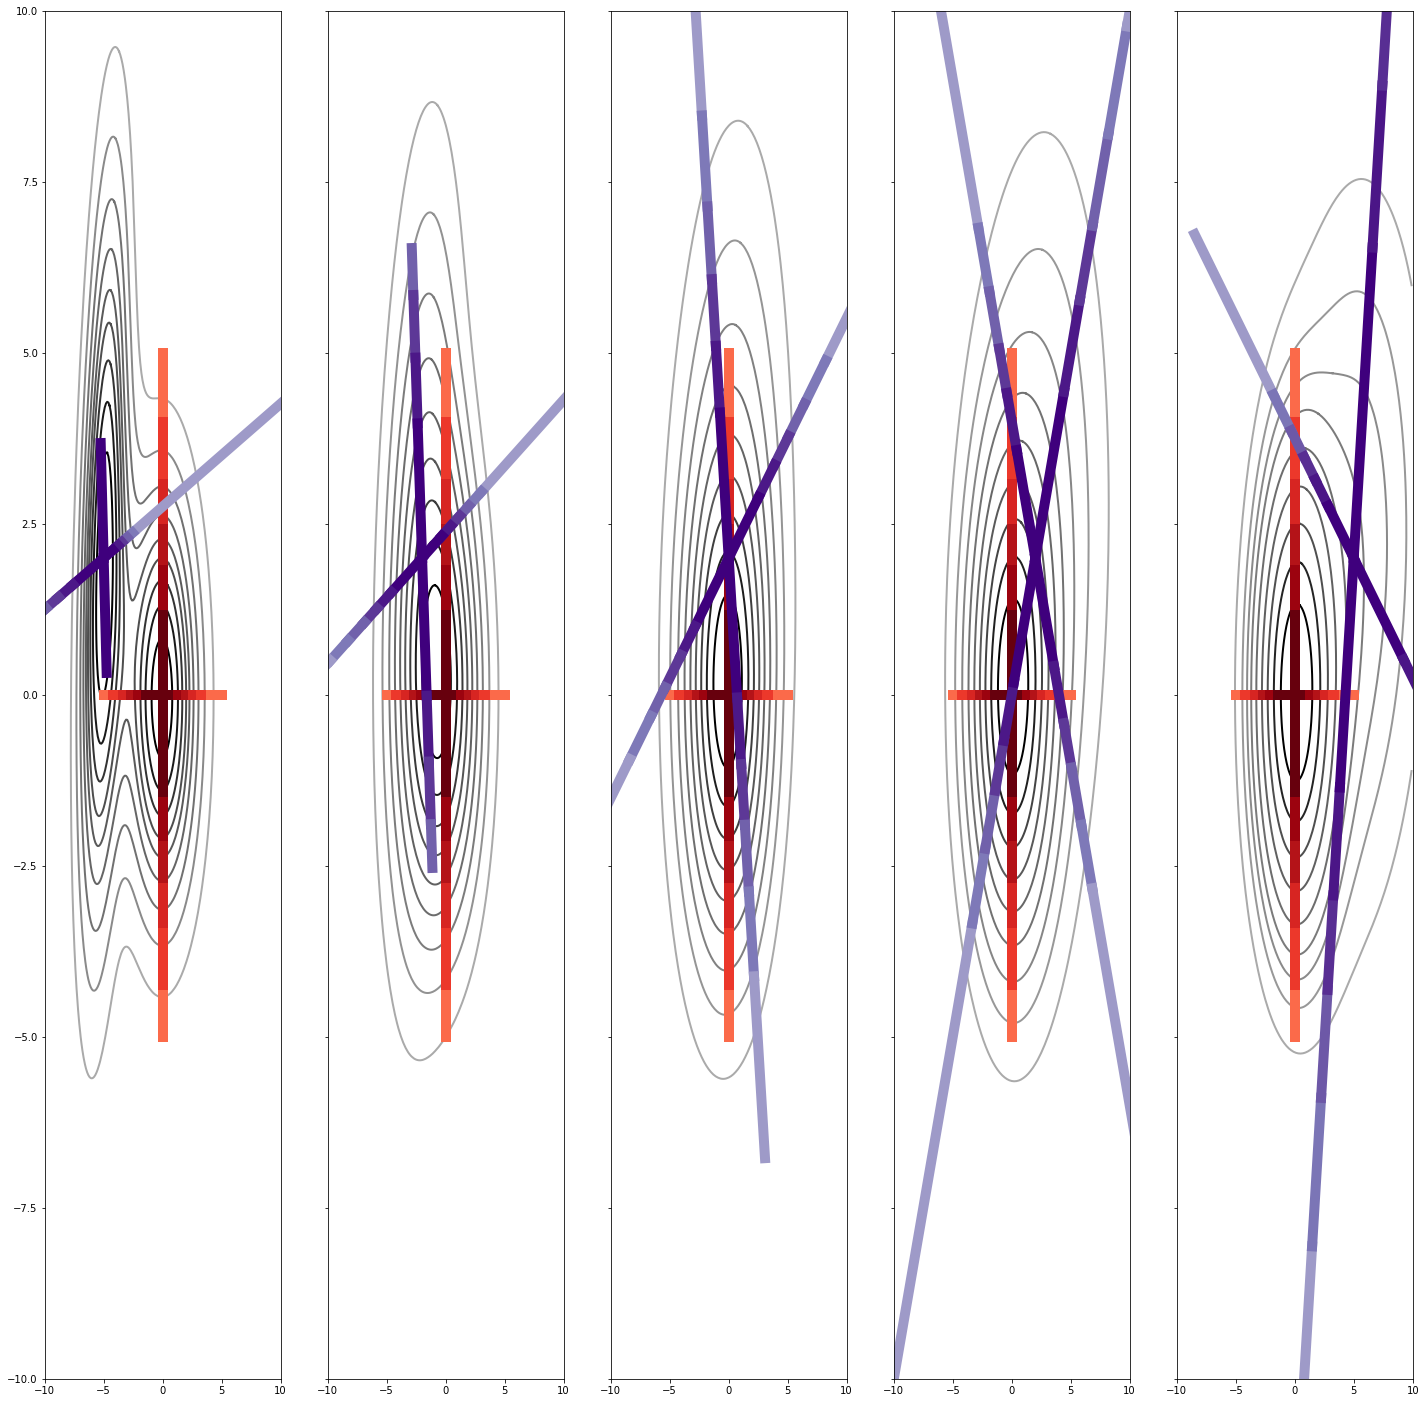

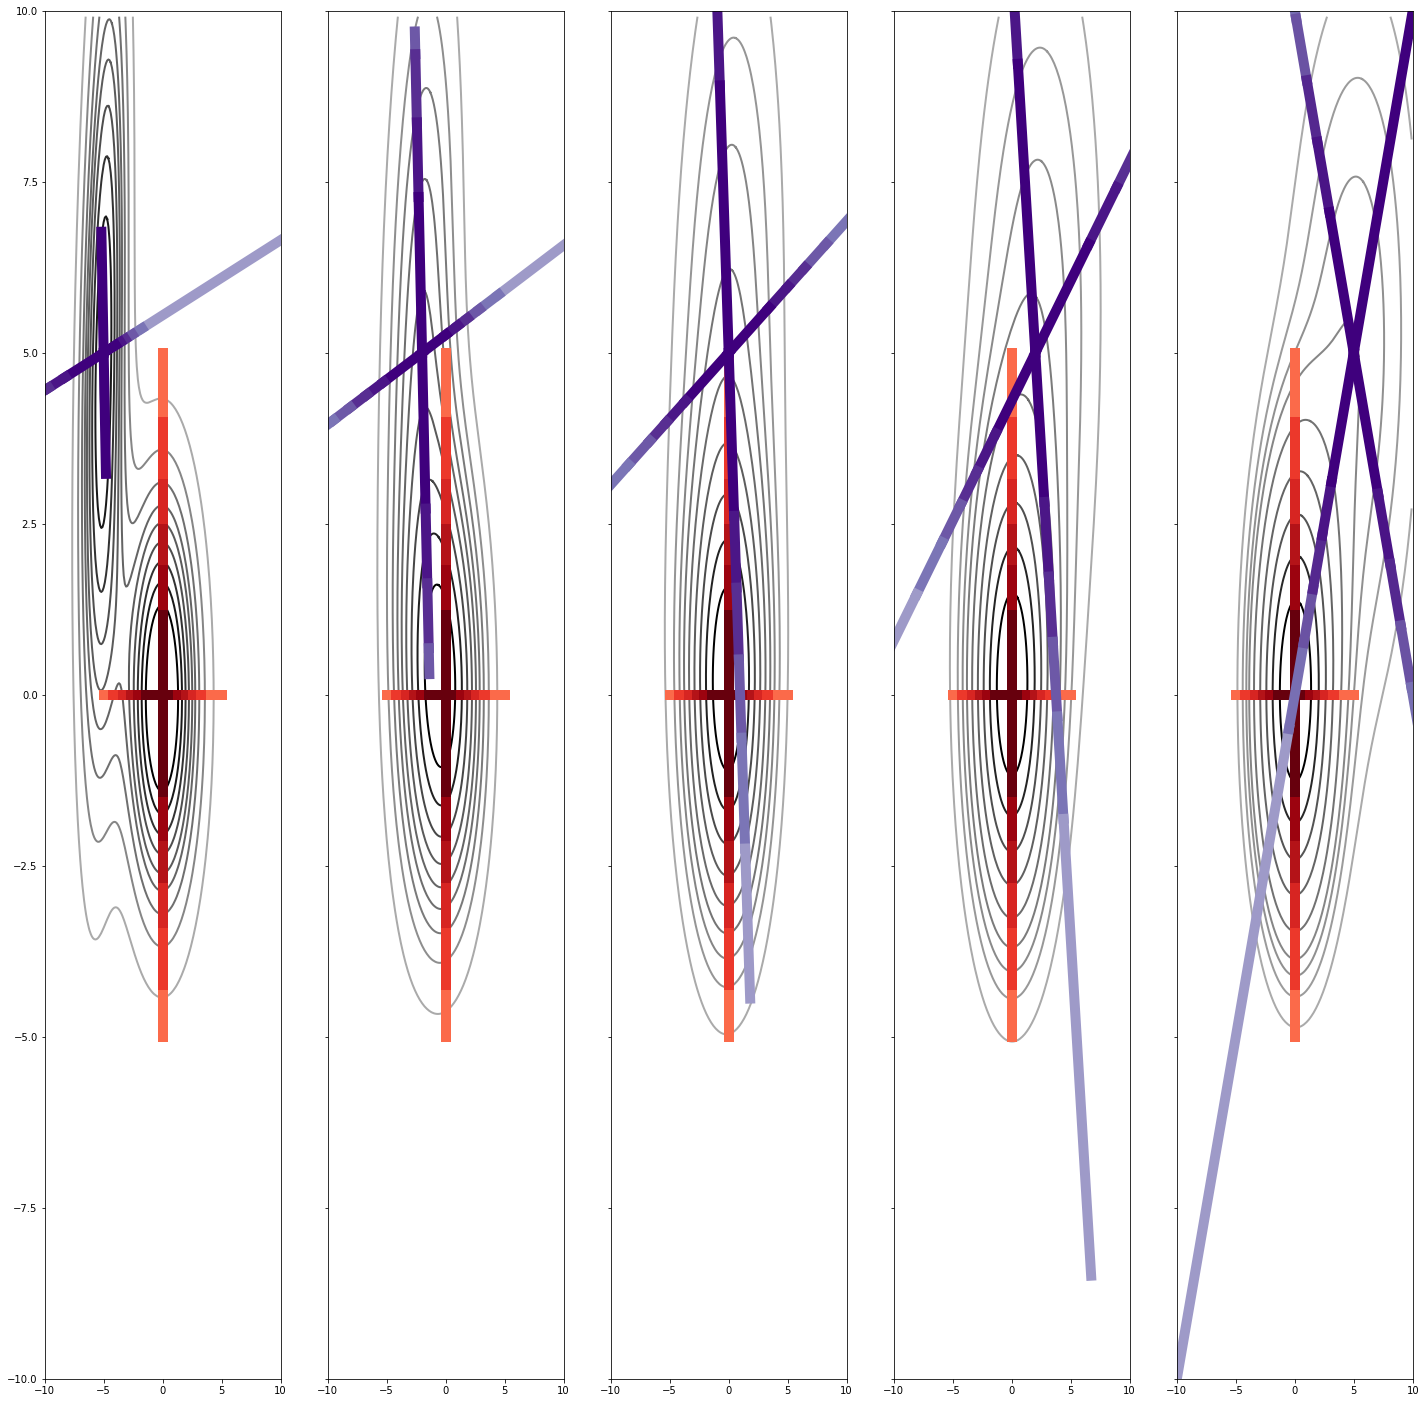

In [20]:
picture_cross_2.plot_images(images_2_cross, gaussians_2, z_sums_cross, linewidth_cross = 10)